<a href="https://colab.research.google.com/github/leen204/mining-project/blob/main/DATA%20MINING%20NOTEBOOK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Goal


Goal: The goal of this project is to analyze the dataset, identify significant risk factors, and develop predictive models to assist in the early detection and understanding of Alzheimer’s Disease.


#Source


https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset

#Dataset information


In order to efficiently retrive the dataset's information we need to import it as follows:


In [ ]:
import pandas as pd
df = pd.read_csv('alzheimers_disease_data.csv')
df=df.drop(columns='DoctorInCharge') #This is a column with the same value for all objects so we removed it because it caused an error in the run

after that we can easily obtain the **Dataset Information:**

Class label: Diagnosis

In [ ]:
attribute_info = pd.DataFrame({
    'NameOfAttribute' : df.columns,
    'DataType' : df.dtypes.values
})

print(f"Number of attributes: {len(df.columns)}\n")
print(f"Number of Objects: {len(df)}\n")
print(f"Attirbutes along with their types: \n")
print(attribute_info)
print('\n')



Number of attributes: 34

Number of Objects: 2149

Attirbutes along with their types: 

              NameOfAttribute DataType
0                   PatientID    int64
1                         Age    int64
2                      Gender    int64
3                   Ethnicity    int64
4              EducationLevel    int64
5                         BMI  float64
6                     Smoking    int64
7          AlcoholConsumption  float64
8            PhysicalActivity  float64
9                 DietQuality  float64
10               SleepQuality  float64
11    FamilyHistoryAlzheimers    int64
12      CardiovascularDisease    int64
13                   Diabetes    int64
14                 Depression    int64
15                 HeadInjury    int64
16               Hypertension    int64
17                 SystolicBP    int64
18                DiastolicBP    int64
19           CholesterolTotal  float64
20             CholesterolLDL  float64
21             CholesterolHDL  float64
22   Cholestero

#  sampling

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv('alzheimers_disease_data.csv')
sample_size = 100  # sample size
strat_sample, _ = train_test_split(df, test_size=(1 - sample_size / len(df)), stratify=df["Diagnosis"], random_state=42)

#Display the class distribution in the sample to verify
print("Sample class distribution:\n", strat_sample["Diagnosis"].value_counts(normalize=True) * 100)


Sample class distribution:
 Diagnosis
0    65.0
1    35.0
Name: proportion, dtype: float64


# show the Missing values

In [ ]:

missing_counts = df.isnull().sum()
print("Missing values in each column:")
print(missing_counts)
print()
rows_with_missing = df.isnull().sum(axis=1)
print("Rows with missing values:")
print(rows_with_missing);

Missing values in each column:
PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
Difficul

We notice that there are no missing values, and all columns are complete.



#*Summarization of the data using graphs before data pre-processing*

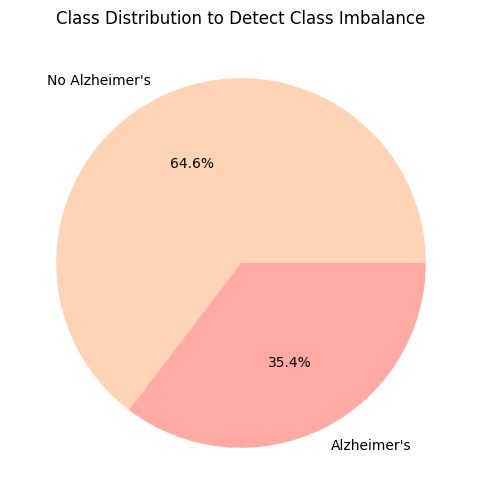

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('alzheimers_disease_data.csv')

diagnosis_labels = {0: "No Alzheimer's", 1: "Alzheimer's"}

df['Diagnosis'] = df['Diagnosis'].map(diagnosis_labels)
class_counts = df['Diagnosis'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct="%1.1f%%", colors =  ["#FFD3B5", "#FFAAA5"]
 )
plt.title('Class Distribution to Detect Class Imbalance')
plt.show()

We used a pie chart to illustrate the percentage distribution of Alzheimer's diagnosis in the dataset, resulting in **64.6% No Alzheimer's** and **35.4% Alzheimer's**.

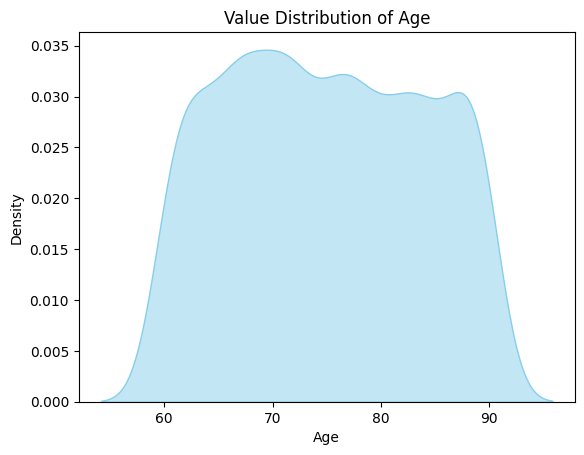

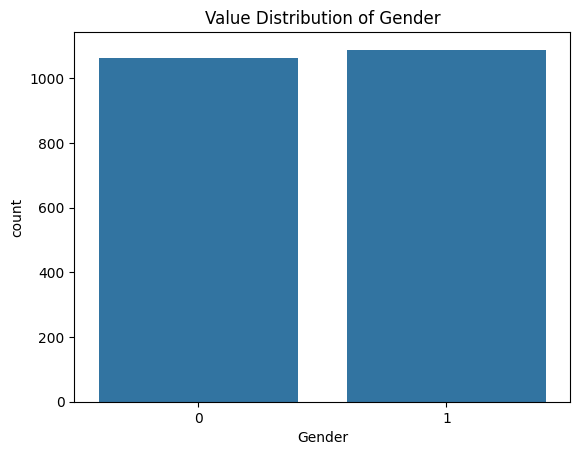

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('alzheimers_disease_data.csv')
sns.kdeplot(df['Age'], fill=True, color='skyblue', alpha=0.5)
plt.title('Value Distribution of Age')
plt.show()

sns.countplot(x=df['Gender'])
plt.title('Value Distribution of Gender')
plt.show()

The density plot illustrates how ages of individuals are distributed

The bar chart shows the distribution of gender in dataset .
0 = female , 1 = male

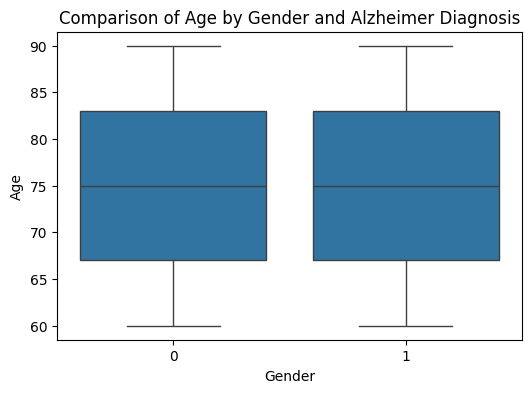

In [ ]:
import matplotlib.pyplot as plt

import seaborn as sns


plt.figure(figsize=(6, 4))
sns.boxplot(x='Diagnosis', y='Age', data=df)
plt.title('Comparison of Age by Gender and Alzheimer Diagnosis')
plt.xlabel('Gender')
plt.ylabel('Age')

plt.show()

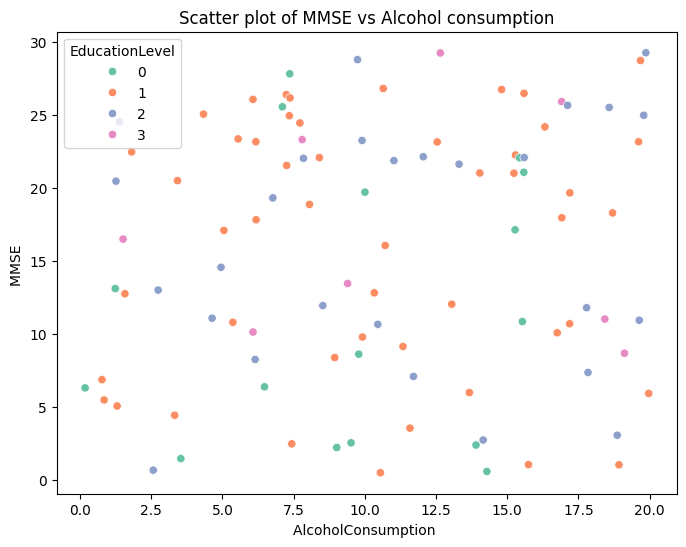

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
sns.scatterplot(data=strat_sample, x='AlcoholConsumption', y='MMSE' , hue='EducationLevel', palette='Set2')


plt.title('Scatter plot of MMSE vs Alcohol consumption')
plt.xlabel('AlcoholConsumption ')
plt.ylabel('MMSE ')
plt.show()

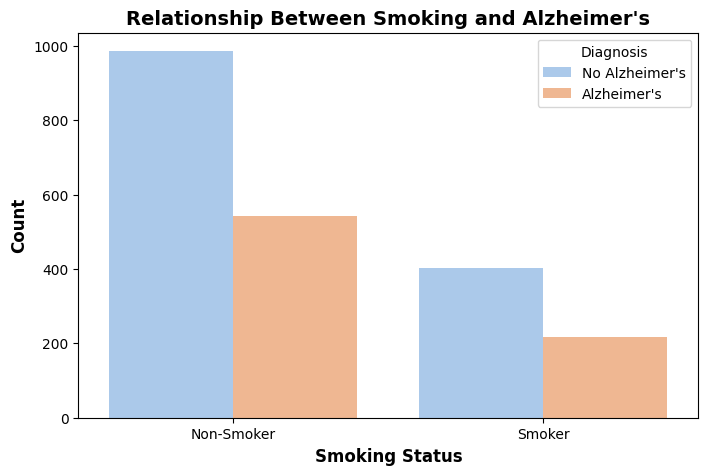

In [ ]:
import seaborn as sns
df = pd.read_csv('alzheimers_disease_data.csv')

smoking_labels = {0: "Non-Smoker", 1: "Smoker"}
diagnosis_labels = {0: "No Alzheimer's", 1: "Alzheimer's"}

df['Smoking'] = df['Smoking'].map(smoking_labels)
df['Diagnosis'] = df['Diagnosis'].map(diagnosis_labels)

plt.figure(figsize=(8,5))
sns.countplot(x=df['Smoking'], hue=df['Diagnosis'], palette="pastel")

plt.xlabel("Smoking Status", fontsize=12, fontweight='bold')
plt.ylabel("Count", fontsize=12, fontweight='bold')
plt.title("Relationship Between Smoking and Alzheimer's", fontsize=14, fontweight='bold')
plt.legend(title="Diagnosis")

plt.show()

We used a bar chart to show the relationship between smoking and Alzheimer's. The results indicate that non-smokers are more common in both groups, but there are still many smokers among Alzheimer's patients.





# Show the Min., 1st Qu., Median, Mean ,3rd Qu.,Max., Mode. :

Using the summary_stats() function, we can derive key insights from the dataset. Based on these summary statistics, several important observations and mode values can be identified.

**Age**: The ages span from 60 to 90 years, with a median of 75 years and a mean of 74.91 years. The mode is 73 years, indicating a focus on elderly individuals.

**BMI**: BMI values range from 15.01 to 39.99, with a median of 27.82 and a mean of 27.65. The mode is 22.93, reflecting variability in weight, centered around the overweight category.

**MMSE:** is a continuous variable, with a mean of 0.49, a median of 0.48, and a mode of 0.71, indicating variability in cognitive function among individuals.

**SystolicBP**: Systolic blood pressure ranges from 90 to 179, with a median of 134 and a mean of 134.26. The mode is 142, indicating mostly normal to slightly elevated levels.

**DiastolicBP**: Diastolic blood pressure ranges from 60 to 119, with a median of 91 and a mean of 89.85. The mode is 72, showing moderate variability.

**Cholesterol** (Total, LDL, HDL): Total cholesterol (mean: 225.20, mode: 242.37), LDL (mean: 124.33, mode: 56.15), and HDL (mean: 59.46, mode: 33.68) indicate significant variability across individuals.

**Hypertension**: Hypertension is a binary variable, with a mode of 0, meaning most individuals do not have hypertension.

**Cardiovascular** Disease: The mode is 0, indicating most individuals do not have cardiovascular disease.

**Diabetes**: The mode is 1, showing some individuals have diabetes, but it is not widespread.

**Diagnosis**: The mode is 0, indicating most individuals have not been diagnosed positively.

In [ ]:
selected_columns = [
    "Age", "BMI", "SystolicBP", "DiastolicBP", "CholesterolTotal",
    "CholesterolLDL", "CholesterolHDL", "Hypertension","Gender",
    "CardiovascularDisease", "Diabetes", "Diagnosis","MMSE"
]
summary_stats = df[selected_columns].describe()
print(summary_stats)



               Age          BMI   SystolicBP  DiastolicBP  CholesterolTotal  \
count  2149.000000  2149.000000  2149.000000  2149.000000       2149.000000   
mean     74.908795    27.655697   134.264774    89.847836        225.197519   
std       8.990221     7.217438    25.949352    17.592496         42.542233   
min      60.000000    15.008851    90.000000    60.000000        150.093316   
25%      67.000000    21.611408   112.000000    74.000000        190.252963   
50%      75.000000    27.823924   134.000000    91.000000        225.086430   
75%      83.000000    33.869778   157.000000   105.000000        262.031657   
max      90.000000    39.992767   179.000000   119.000000        299.993352   

       CholesterolLDL  CholesterolHDL  Hypertension       Gender  \
count     2149.000000     2149.000000   2149.000000  2149.000000   
mean       124.335944       59.463533      0.148906     0.506282   
std         43.366584       23.139174      0.356079     0.500077   
min         50.2

In [ ]:
mode_values = df[selected_columns].iloc[0]
print(mode_values)

Age                       73.000000
BMI                       22.927749
SystolicBP               142.000000
DiastolicBP               72.000000
CholesterolTotal         242.366840
CholesterolLDL            56.150897
CholesterolHDL            33.682563
Hypertension               0.000000
Gender                     0.000000
CardiovascularDisease      0.000000
Diabetes                   1.000000
Diagnosis                  0.000000
MMSE                      21.463532
Name: 0, dtype: float64



# Show the Variance:

Variance measures how spread out values are. A higher variance means more dispersion, while a lower variance means values are closer to the mean. Therefore, our variance results indicate:

**SystolicBP, CholesterolTotal, and CholesterolLDL:**
These columns have a high variance with values (673.37, 1809.84, 1880.66) respectively. This indicates a significant level of dispersion, reflecting a wide spread in blood pressure and cholesterol levels.

**Age , BMI, DiastolicBP, CholesterolHDL,Gender,and MMSE:**  These columns exhibit a moderate level of variance with values (80.82, 52.09, 309.50, 535.42, 0.25, and 0.08) respectively. This suggests a noticeable spread in age, BMI, and blood pressure, but not as extreme as the previous group. The variance in Gender (0.25) indicates a nearly equal distribution of males and females, ensuring a fair representation in gender-based analysis

**Hypertension, CardiovascularDisease, Diabetes, and Diagnosis:**
These columns have low variance with values (0.13, 0.12, 0.13, and 0.23) respectively. This indicates that most  individuals have similar values in these categories, reflecting limited variability in the dataset.

In [ ]:
variance=df[selected_columns].var(numeric_only=True)
print(variance)

Age                        80.824080
BMI                        52.091413
SystolicBP                673.368875
DiastolicBP               309.495923
CholesterolTotal         1809.841576
CholesterolLDL           1880.660612
CholesterolHDL            535.421368
Hypertension                0.126792
Gender                      0.250077
CardiovascularDisease       0.123502
Diabetes                    0.128096
Diagnosis                   0.228689
MMSE                       74.186375
dtype: float64


# Data Preprocessing:

1. Variable Transformation:

Discretization:
We have noticed that the age column values go from 60 To 90 so we decided to devide these values to fit into the following 5 intervals (ensuring an equal difference between all intervals) : (60-66) (67-72) (73-78) (79-84) (85-90)





In [ ]:
#Specifying the column to discretisize
column_to_discretize = 'Age'
num_of_intervals = 5
labels = ["60-66", "67-72", "73-78", "79-84", "85-90"]
#preprocessed_df = df.copy()

#Discretization Process
df[column_to_discretize] = pd.cut(df[column_to_discretize], bins=num_of_intervals, labels=False)

print(df[column_to_discretize])

0       2
1       4
2       2
3       2
4       4
       ..
2144    0
2145    2
2146    2
2147    2
2148    1
Name: Age, Length: 2149, dtype: int64


2. Noramlization
After looking at our dataset we've noticed that we have many unormalized columns with values that vary in range so in order to give all our values equal weight and make this easier to work with we've decided to normalize the following columns using the MinMaxScaler
BMI - Alcohol consumption - Physical Activity - Diet Quality - Sleep Quality - SystolicBP - CholesterolTotal- CholesterolLDL - CholesterolHDL - CholesterolTriglycerides - MMSE - FunctionalAssessment - ADL

In [ ]:
from sklearn.preprocessing import MinMaxScaler

#Specifying scaler + Columns
columns_to_normalize = ['BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'SystolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL']
scaler = MinMaxScaler()

#Normalization Process
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

#print(df[columns_to_normalize])
print(df[columns_to_normalize])

           BMI  AlcoholConsumption  PhysicalActivity  DietQuality  \
0     0.316960            0.665183          0.633375     0.133931   
1     0.473058            0.227170          0.762862     0.050995   
2     0.111553            0.978276          0.785408     0.181896   
3     0.752163            0.610751          0.843804     0.743443   
4     0.228472            0.923204          0.631707     0.078698   
...        ...                 ...               ...          ...   
2144  0.965137            0.078006          0.405291     0.655316   
2145  0.114035            0.938860          0.135925     0.289848   
2146  0.018717            0.229779          0.989841     0.811960   
2147  0.011650            0.433901          0.636096     0.125543   
2148  0.731706            0.394686          0.657802     0.794079   

      SleepQuality  SystolicBP  CholesterolTotal  CholesterolLDL  \
0         0.837564    0.584270          0.615567        0.039538   
1         0.525021    0.280899     

3. Removing highly correlated columns:
In this step we will detect highly correlated columns and remove them

In [ ]:
import numpy as np

# Calculate correlation matrix
correlation_matrix = df.corr(numeric_only=True).abs()

# Set correlation threshold
correlation_threshold = 0.75

# Find upper triangle (to avoid duplicate pairs)
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Identify columns to remove
to_remove = [column for column in upper_tri.columns if any(upper_tri[column] >= 0.75)]

# Print columns to be removed
print("Columns to be removed due to high correlation:", len(to_remove))

Columns to be removed due to high correlation: 0


4- Removing noise
as part pf data preprocessing we have to check for outliers and handle them.

In [ ]:
from scipy.stats import zscore
z_scores= zscore(df['Age'])
threshold=3
outliers=[df.iloc[i] for i, z in enumerate(z_scores) if abs(z)>threshold]
print("outliers",outliers)


z_scoresbmi= zscore(df['BMI'])
threshold=3
outliers1=[df.iloc[i] for i, z in enumerate(z_scores) if abs(z)>threshold]
print("outliers",outliers1)



z_scoresbmi= zscore(df['AlcoholConsumption'])
threshold=3
outliers2=[df.iloc[i] for i, z in enumerate(z_scores) if abs(z)>threshold]
print("outliers",outliers2)


z_scoresbmi= zscore(df['DietQuality'])
threshold=3
outliers3=[df.iloc[i] for i, z in enumerate(z_scores) if abs(z)>threshold]
print("outliers",outliers3)


z_scoresbmi= zscore(df['SleepQuality'])
threshold=3
outliers4=[df.iloc[i] for i, z in enumerate(z_scores) if abs(z)>threshold]
print("outliers",outliers4)



z_scoresbmi= zscore(df['SystolicBP'])
threshold=3
outliers5=[df.iloc[i] for i, z in enumerate(z_scores) if abs(z)>threshold]
print("outliers",outliers5)

z_scoresbmi= zscore(df['CholesterolTotal'])
threshold=3
outliers6=[df.iloc[i] for i, z in enumerate(z_scores) if abs(z)>threshold]
print("outliers",outliers6)

z_scoresbmi= zscore(df['CholesterolLDL'])
threshold=3
outliers7=[df.iloc[i] for i, z in enumerate(z_scores) if abs(z)>threshold]
print("outliers",outliers7)


z_scoresbmi= zscore(df['CholesterolHDL'])
threshold=3
outliers8=[df.iloc[i] for i, z in enumerate(z_scores) if abs(z)>threshold]
print("outliers",outliers8)


outliers []
outliers []
outliers []
outliers []
outliers []
outliers []
outliers []
outliers []
outliers []


5. Feature Selection:
Now that we have fully preprocessed our data to have a clean version of the dataset, we can start working on the feature selection process, which chooses the best features to be used in the model building process. we used the wrapper method in order to get the best result. we faced some issues where it reached the max number of iterations without determining the features, but we fixed that by maxing the iterations.

In [ ]:
#feature selection
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE


model = LogisticRegression(solver='liblinear', max_iter=5000)
rfe = RFE(model, n_features_to_select=8)
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']
fit = rfe.fit(X, y)

feature_label= X.columns[fit.support_].tolist()
selected_features = [i for i, mask in enumerate(rfe.support_) if mask]

print("Index of the best features", selected_features)
print("Title of features to choose", feature_label)


Index of the best features [6, 15, 16, 24, 25, 26, 27, 28]
Title of features to choose ['Smoking', 'HeadInjury', 'Hypertension', 'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion']
